<a href="https://colab.research.google.com/github/Yoon0527/AI_study/blob/main/%5Binf_learn_CNN%5D_Keras_Framework_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

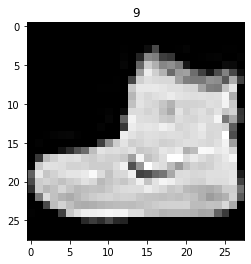

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [7]:
train_images[0, :, :], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

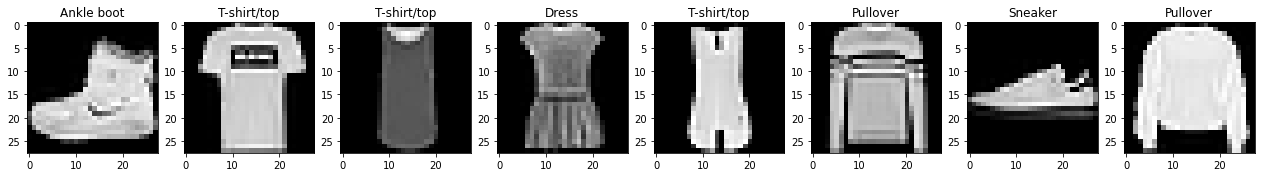

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)

In [9]:
import numpy as np

def get_preprocess_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = get_preprocess_data(train_images, train_labels)
test_images, test_labels = get_preprocess_data(test_images, test_labels)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [12]:
INPUT_SIZE = 28

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
                    Dense(100, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [16]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5264 - accuracy: 0.8163
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3829 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3442 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3186 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.8881
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2872 - accuracy: 0.8946
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2760 - accuracy: 0.8974
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2652 - accuracy: 0.9023
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2567 - accuracy: 0.9041
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.248

In [18]:
model2 = Sequential([
                     Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
                     Dense(100, activation='relu'),
                     Dense(30, activation='relu'),
                     Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model2.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model2.fit(x=train_images, y=train_labels, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5077 - accuracy: 0.8222
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3757 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3363 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2967 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.8938
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2726 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2628 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2518 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.244

In [28]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [29]:
pred_proba_one = model.predict(np.expand_dims(test_images[0], axis=0))
print(pred_proba_one)

[[8.7078158e-09 1.8724433e-11 2.7106650e-10 4.2866895e-06 3.1800482e-10
  2.8149498e-04 4.4300978e-07 1.9530840e-04 8.1202501e-12 9.9951851e-01]]


In [30]:
pred = np.argmax(np.squeeze(pred_proba_one))
print(pred)

9


In [32]:
model.evaluate(test_images, test_labels, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8854


[0.35976937413215637, 0.8853999972343445]

In [43]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
#import pandas as pd

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocess_data(images, labels):

  images = np.array(images/255, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = get_preprocess_data(train_images, train_labels)
test_images, test_labels = get_preprocess_data(test_images, test_labels)

In [44]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)

tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

In [45]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

INPUT_SIZE = 28

model = Sequential([
                    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
                    Dense(100, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(10, activation='softmax')
])

model.compile(optimizer = Adam(0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 2s 4ms/step - loss: 0.6029 - accuracy: 0.7952 - val_loss: 0.4457 - val_accuracy: 0.8442
Epoch 2/20
399/399 [==============================] - 2s 6ms/step - loss: 0.4185 - accuracy: 0.8533 - val_loss: 0.4122 - val_accuracy: 0.8520
Epoch 3/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3760 - accuracy: 0.8675 - val_loss: 0.3943 - val_accuracy: 0.8632
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8740 - val_loss: 0.3854 - val_accuracy: 0.8642
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8796 - val_loss: 0.3736 - val_accuracy: 0.8662
Epoch 6/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.8849 - val_loss: 0.3508 - val_accuracy: 0.8726
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3035 - accuracy: 0.8912 - val_loss: 0.3367 - val_accuracy: 0.8772
Epoch 

In [47]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6028531193733215, 0.41854119300842285, 0.3759952783584595, 0.35318171977996826, 0.33442452549934387, 0.317633718252182, 0.30349868535995483, 0.2957276999950409, 0.28529658913612366, 0.2750670909881592, 0.2649785876274109, 0.26065006852149963, 0.25298142433166504, 0.24271436035633087, 0.23718564212322235, 0.23267453908920288, 0.22435419261455536, 0.2218904197216034, 0.21665990352630615, 0.20989881455898285]
[0.7951764464378357, 0.8532549142837524, 0.8674705624580383, 0.8739804029464722, 0.8796078562736511, 0.8848627209663391, 0.8912352919578552, 0.8930392265319824, 0.8949607610702515, 0.8995097875595093, 0.9028431177139282, 0.9046862721443176, 0.9074313640594482, 0.9107843041419983, 0.9127647280693054, 0.9138431549072266, 0.9164509773254395, 0.9175097942352295, 0.9192352890968323, 0.9211568832397461]
[0.44568943977355957, 0.4121840000152588, 0.3942926824092865, 0.38537853956222534, 0.37355828285217285, 0.35080698132514954, 0.33673396706581116, 0.3387451171875, 0.33603978157043457, 0.

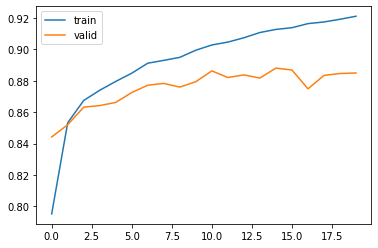

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

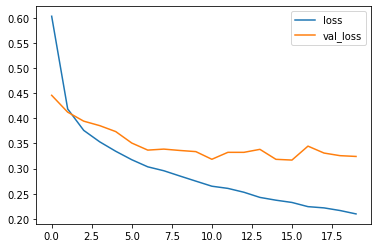

In [52]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()